Things done to the data:
- Mapped Sex to be a binary classification with male = 1 and female = 0
- Imputed Missing Values. 
  - Cabin was removed due to having to many missing values
  - We filled missing Age values with the mean of the Age values
  - We also filled missing Embarked values with the mode of the embarked values.

Info about the data:
- Pclass (Passenger Class): 
  - refers to the class of the passengers. Pclass = 1 was upper class Pclass = 2 middle class Pclass = 3 lower class
  - Pclass plays a significant role the the survival rate of passengers. likely because they had better access to life boats.
- Parch (Parents and Children):
  - Parch = 0: The passenger had no parents or children with them
  - Parch = 1: the passenger was treveling either one parent or one child
  - Parch = 2: The passenger had two parents/children, and so on.
- SibSp (Sibling and Spouses)
  - SibSp = 0: The passenger had no siblings or spouse with them.
  - SibSp = 1: The passenger was traveling with one sibling or spouse.
  - SibSp = 2: The passenger had two siblings or a combination of siblings and spouse with them, and so on.
- Embarked
  - S: Southampton
  - C: Cherbourg
  - Q: Queenstown

Some EDA (More should follow):
- Correlation Matrix
  - Survived has a negative correlation with Pclass at -0.34 meaning that as pclass increase (the lower class status you are) the lower your chances of survival are.
  - Fare is positively correlated with survival 0.26 which tells us that people who paid more for their ticket had better odds of surviving. Likely because they are wealthy and are grouped in pclass=1.
  - SibSp and Parch have a slight positive correlation with survival. which tells us that passengers with family members onboard might have had slighly better survival chances.
- Sex vs. Survival:
  - Woman had a much higher survival rate (~75%) compared to males (~20%)
- Pclass vs Survival
  - 1st class had the highest survival rate ~65%
  - 3rd class had the lowers survival rate >30%
  - The survival rate generally decreases as passenger class increases. (wealthier passengers had a higher chance of living)
- Age vs Survival
  - Children (under 12) had the highest survival rate ~60%
  - Seniors (over 60) had the lowest survival rate

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
   

/var/folders/4j/2vwq5lfj3m3399dm2npr95l00000gn/T/ipykernel_26448/204486872.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/var/folders/4j/2vwq5lfj3m3399dm2npr95l00000gn/T/ipykernel_26448/204486872.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


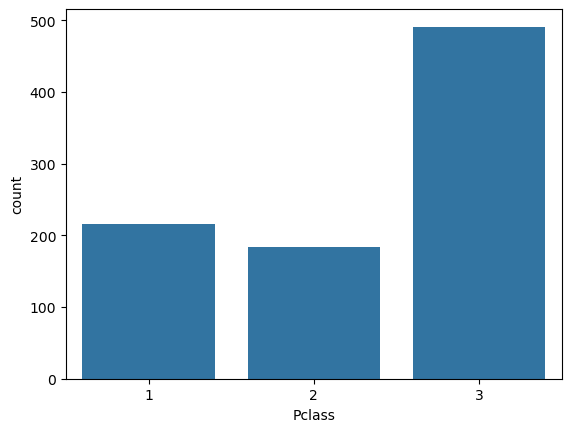

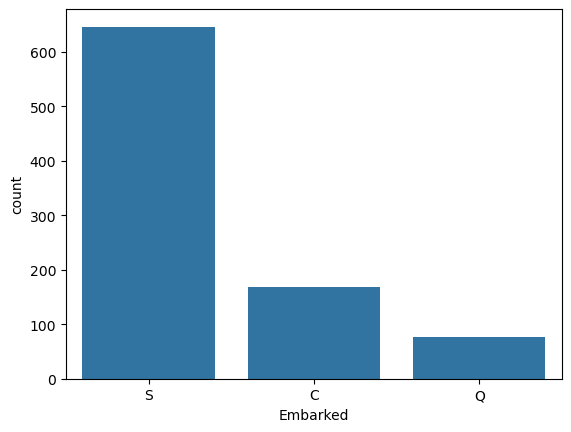

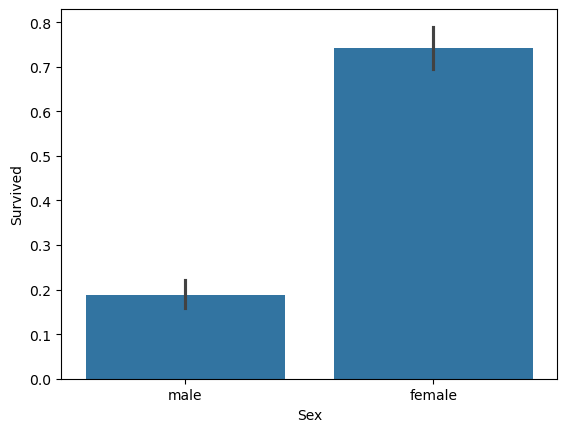

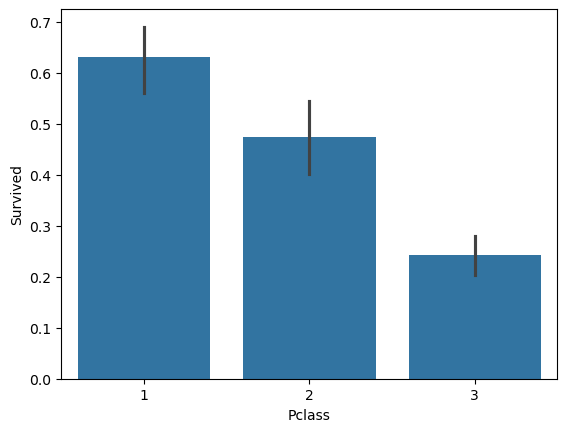

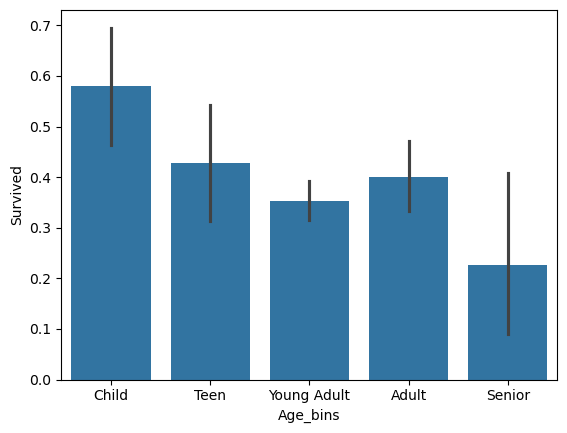

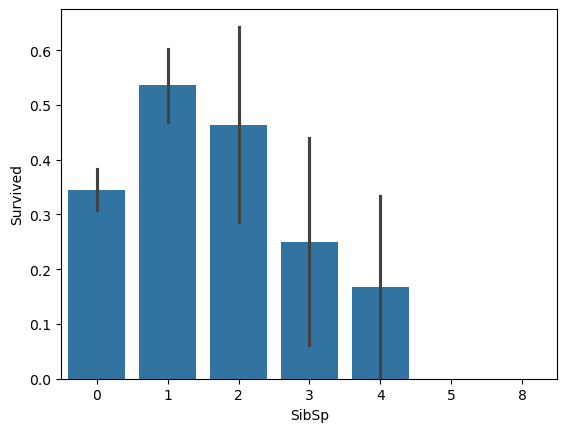

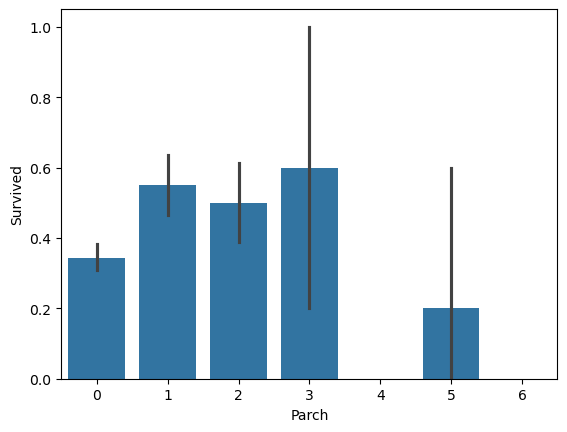

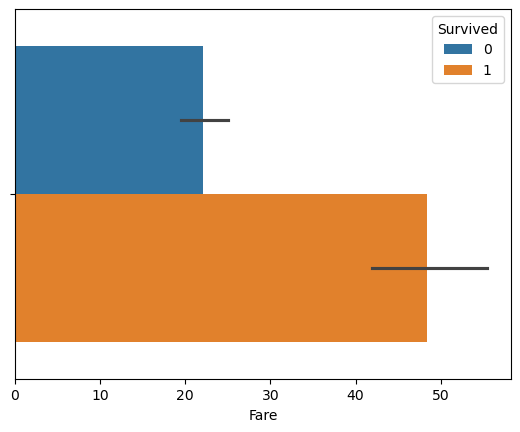

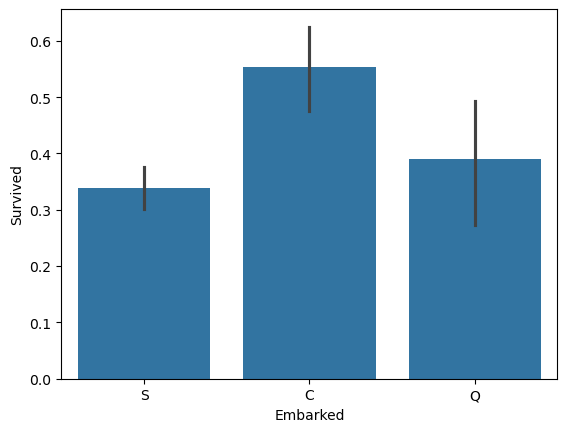

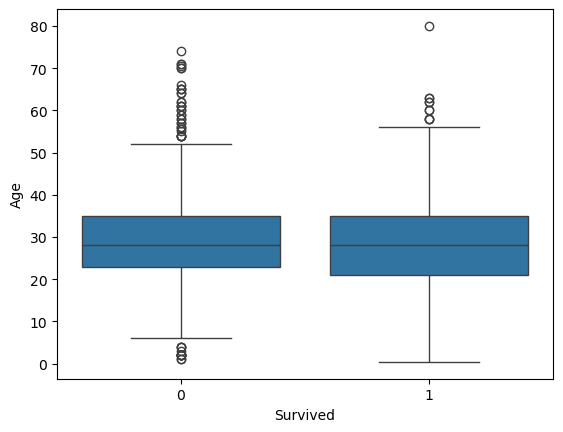

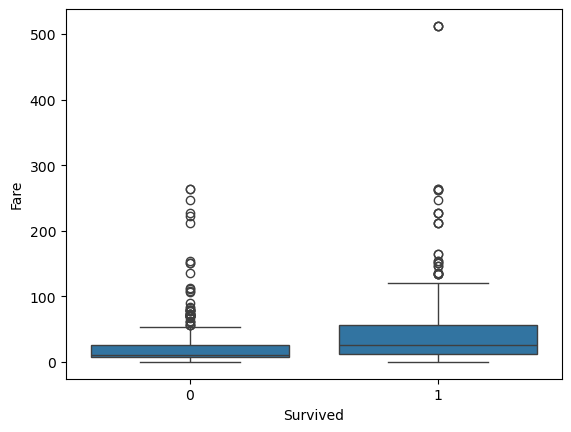

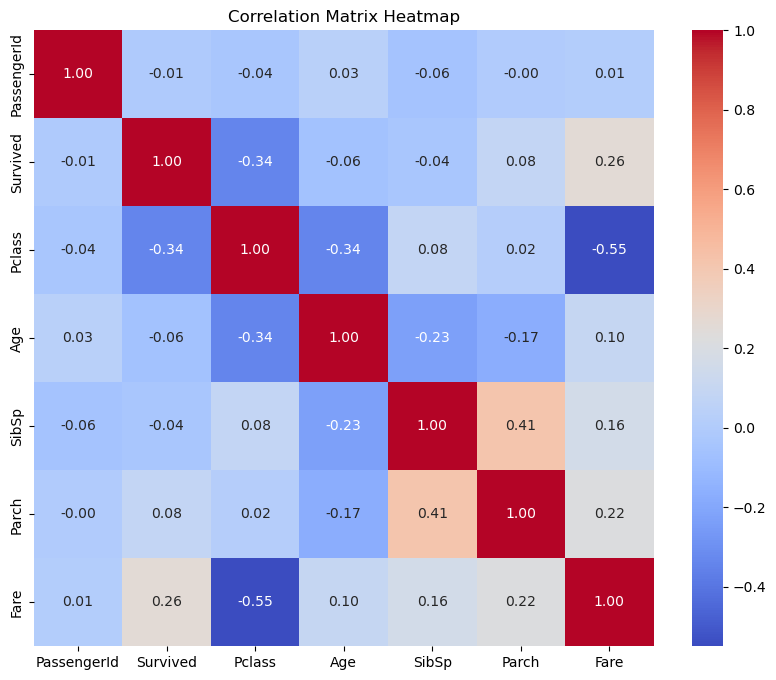

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset
df = pd.read_csv('Titanic-Dataset.csv')

df.info()

# Check for missing values
print(df.isnull().sum())

# Summary statistics for numeric features
print(df.describe())

# Impute missing values for Age by median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Impute missing values for Embarked by mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin column
df.drop('Cabin', axis=1, inplace=True)

#df["Sex"] = df["Sex"].map({"male": 1, "female": 0})

display(df.head(5))


sns.countplot(data=df, x="Pclass")
plt.show()

sns.countplot(data=df, x="Embarked")
plt.show()

# Show survival rate by Sex
sns.barplot(x='Sex', y='Survived', data=df)
plt.show()

# Survival rate by Pclass
sns.barplot(x='Pclass', y='Survived', data=df)
plt.show()

# Survival rate by Age
df['Age_bins'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 80], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
sns.barplot(x='Age_bins', y='Survived', data=df)
plt.show()

# Survival rate by SibSp
sns.barplot(x='SibSp', y='Survived', data=df)
plt.show()

# Survival rate by Parch
sns.barplot(x='Parch', y='Survived', data=df)
plt.show()

# Survival rate by Fare
sns.barplot(data=df, x='Fare', hue='Survived')
plt.show()

# Survival rate by Embarked
sns.barplot(x='Embarked', y='Survived', data=df)
plt.show()

## Detect Outliers
# Boxplot for Age
sns.boxplot(data=df, x='Survived', y='Age')
plt.show()

# Boxplot for Fare
sns.boxplot(data=df, x='Survived', y='Fare')
plt.show()

#heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


